
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
plt.style.use('ggplot')
% matplotlib inline
%load_ext giphy_magic

## Load the data into a DataFrame
## Transform the dates if needed, e.g.
#df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [2]:
#I attempted to do silly things which eventually resulted in me scrapping my first model and forcing myself to make
#a copy of my project because the original was unsalvageable.
#labels=[u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
#       u'County', u'Category', u'Category Name', u'Vendor Number',
#       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
#       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
#       u'sales_usd', u'liters_sold', u'gallons_sold']

In [3]:
iowa_alcohol = pd.read_csv('/Users/Red/Desktop/Iowa Liquor/Iowa_Liquor_Sales_reduced.csv', low_memory=False)

In [12]:
iowa_alcohol.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [4]:
def eda(dataframe):
    # Thank god for ritika's function
    print "Missing Values \n \n", dataframe.isnull().sum(),"\n"
    print "Duplicate Rows \n", dataframe.duplicated().sum(),"\n"
    print "Dataframe Types \n \n", dataframe.dtypes,"\n"
    print "Dataframe Shape \n", dataframe.shape,"\n"
    print "Dataframe Describe \n \n", dataframe.describe(include='all'),"\n"
    for feature in dataframe:
        print feature
        print dataframe[feature].nunique()

In [8]:
eda(iowa_alcohol)

Missing Values 
 
Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number          10913
County                 10913
Category                 779
Category Name           6109
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
sales_usd                  0
liters_sold                0
gallons_sold               0
dtype: int64 

Duplicate Rows 
2989 

Dataframe Types 
 
Date                    object
Store Number             int64
City                    object
Zip Code                object
County Number          float64
County                  object
Category               float64
Category Name           object
Vendor Number            int64
Item Number              int64
Item Description        object
Bottle Volume (ml)       int64
State Bottle Cost       object


In [5]:
iad = iowa_alcohol.dropna() #dropping all missing values

In [19]:
type(iad) #confirming type

pandas.core.frame.DataFrame

In [25]:
iad.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),sales_usd
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,$179.88,4.50,1.19,179.88
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,$37.50,2.00,0.53,37.50
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,$53.76,10.50,2.77,53.76
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,$161.28,9.60,2.54,161.28
5,2016-03-31,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,23.00,34.50,1,$34.50,0.75,0.20,34.50


In [7]:
pd.options.mode.chained_assignment = None #command I used to make next parts work

In [8]:
iad["Date"] = pd.to_datetime(iad["Date"], format="%m/%d/%Y")

In [9]:
iad["Date"] = pd.to_datetime(iad["Date"], format="%m-%d-%y")

In [10]:
iad["Date"].head()
#confirming that the conversion worked

0   2016-03-31
1   2016-03-31
2   2016-03-31
3   2016-03-31
5   2016-03-31
Name: Date, dtype: datetime64[ns]

In [11]:
#getting rid of the $ value for my columns

iad['Sale (Dollars)'] = iad['Sale (Dollars)'].replace('[\$,]', '', regex=True).astype(float)
iad['State Bottle Retail'] = iad['State Bottle Retail'].replace('[\$,]', '', regex=True).astype(float)
iad['State Bottle Cost'] = iad['State Bottle Cost'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#adding columns

Adding columns for further reference

In [119]:
iad['Month']=iad['Date'].dt.month #add months and year
iad['Year']=iad['Date'].dt.year

In [120]:
year = (iad['Date'] >= "2015-01-01") & (iad['Date'] <= "2015-12-31")

iad_15 = iad[year].sort_values(by=['Date'])
iad_15.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Retail,Bottles Sold,sales_usd,liters_sold,gallons_sold,Month,Year,pp_liter,pr_mar,Quarter
2709551,2015-01-05,2643,WATERLOO,50701,7.0,Black Hawk,1012200.0,SCOTCH WHISKIES,260,5329,...,195.00,1,195.00,0.75,0.20,1,2015,260.000000,65.00,1
2701034,2015-01-05,4970,WEST LIBERTY,52776,70.0,Muscatine,1031100.0,100 PROOF VODKA,300,36908,...,11.21,6,67.26,10.50,2.77,1,2015,6.405714,22.44,1
2701033,2015-01-05,3679,MONONA,52159,22.0,Clayton,1022100.0,TEQUILA,434,89447,...,9.89,1,9.89,1.00,0.26,1,2015,9.890000,3.30,1
2701032,2015-01-05,2648,WEST DES MOINES,50265,77.0,Polk,1062050.0,BARBADOS RUM,205,42437,...,12.00,4,48.00,3.00,0.79,1,2015,16.000000,16.00,1
2701031,2015-01-05,3563,MUSCATINE,52761,70.0,Muscatine,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,...,11.21,12,134.52,9.00,2.38,1,2015,14.946667,44.88,1


In [20]:
q115 = iad[(iad['Date'] >= '2015-01-01') & (iad['Date'] < '2015-04-01')]['Sale (Dollars)'].sum()
q215 = iad[(iad['Date'] >= '2015-04-01') & (iad['Date'] < '2015-07-01')]['Sale (Dollars)'].sum()
q315 = iad[(iad['Date'] >= '2015-07-01') & (iad['Date'] < '2015-10-01')]['Sale (Dollars)'].sum()
q415 = iad[(iad['Date'] >= '2015-10-01') & (iad['Date'] < '2016-01-01')]['Sale (Dollars)'].sum()
y15 = iad[(iad['Date'] >= '2015-01-01') & (iad['Date'] < '2016-01-01')]['Sale (Dollars)'].sum()
q116 = iad[(iad['Date'] >= '2016-01-01') & (iad['Date'] < '2016-04-01')]['Sale (Dollars)'].sum()

print q115, q215, q315, q415
#calculating sales for every quarter

62934674.68 72318817.96 68570062.72 80089248.25


In [22]:
pincrease = (q116-q115)/q115 * 100
#creating constant for 2016

In [23]:
q216 = q215 * pincrease
q316 = q315 * pincrease
q416 = q415 * pincrease
y16 = y15 * pincrease
print q116,q216,q316,q416

63633748.83 80331258.4859 76167166.2803 88962600.3936


In [24]:
print y15, y16

283912803.609 315368440.159


In [27]:
#q1sales = iad[(iad['Date'] >= '2015-01-01') & (iad['Date'] < '2015-04-01')]['sales_usd']
#q1sales.iloc[:10]

2212926     81.00
2212927     61.38
2212928     13.50
2212929    252.00
2212930     94.20
2212931     16.00
2212932     75.57
2212933     35.37
2212934     46.10
2212935    126.00
Name: sales_usd, dtype: float64

In [22]:
yearlystore = iad[(iad['Date'] >= '2015-01-01') & (iad['Date'] < '2016-01-01')].groupby(['Store Number'])['sales_usd'].sum()#yearly sales for every store
yearlystore.head()



Store Number
2106    1433451.46
2113      85763.42
2130    1107685.25
2152      72080.36
2178     277987.96
Name: sales_usd, dtype: float64

In [60]:
#creating a new dataset for quarters, I spent way too long not being able to make this work due to adjustments I made to the csv (before I got rid of the adjustments)

Sales_2015Q1 = pd.DataFrame({"Sales 2015 Q1":iad[(iad.Date >= "2015-01-01") & (iad.Date <"2015-04-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2015Q2 = pd.DataFrame({"Sales 2015 Q2":iad[(iad.Date >= "2015-04-01") & (iad.Date <"2015-07-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2015Q3 = pd.DataFrame({"Sales 2015 Q3":iad[(iad.Date >= "2015-07-01") & (iad.Date <"2015-10-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2015Q4 = pd.DataFrame({"Sales 2015 Q4":iad[(iad.Date >= "2015-10-01") & (iad.Date <"2016-01-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2016Q1 = pd.DataFrame({"Sales 2016 Q1":iad[(iad.Date >= "2016-01-01") & (iad.Date <"2016-04-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
S15_16 = pd.concat([Sales_2015Q4,Sales_2015Q3,Sales_2015Q2,Sales_2015Q1,Sales_2016Q1], axis = 1, join = 'outer')
S15_16["Total 2015 Sales"] = S15_16["Sales 2015 Q1"] + S15_16["Sales 2015 Q2"] + S15_16["Sales 2015 Q3"] + S15_16["Sales 2015 Q4"]
S15_16["Sales 2016 Q2"] = S15_16["Sales 2015 Q2"] * pincrease  
S15_16["Sales 2016 Q3"] = S15_16["Sales 2015 Q3"] * pincrease  
S15_16["Sales 2016 Q4"] = S15_16["Sales 2015 Q4"] * pincrease  
S15_16["Total 2016 Sales"] = S15_16["Sales 2016 Q1"] + S15_16["Sales 2016 Q2"] + S15_16["Sales 2016 Q3"] + S15_16["Sales 2016 Q4"]
S15_16.head()

,Sales 2015 Q4,Sales 2015 Q3,Sales 2015 Q2,Sales 2015 Q1,Sales 2016 Q1,Total 2015 Sales,Sales 2016 Q2,Sales 2016 Q3,Sales 2016 Q4,Total 2016 Sales
Store Number,,,,,,,,,,
2106,388218.15,335487.56,372579.22,337166.53,337446.81,1433451.46,4138.585015,3726.573340,4312.301201,349624.269556
2113,21146.03,18796.97,23468.56,22351.86,21663.33,85763.42,260.687192,208.795483,234.888685,22367.701360
2130,303233.72,249453.87,277233.20,277764.46,303978.69,1107685.25,3079.487812,2770.916876,3368.299846,313197.394534
2152,15963.55,21051.79,18259.91,16805.11,9307.75,72080.36,202.829857,233.841873,177.322044,9921.743774
2178,79433.52,66304.06,77838.96,54411.42,58749.04,277987.96,864.629953,736.501056,882.342218,61232.513228


In [47]:
S15_16.isnull().sum()
S15_16d = S15_16.dropna()
#drop all the values I no longer need

In [164]:
S15_16d["Sales 2015 Q1"].sort_values(axis = 0, ascending = False)[:10]
# sorting to find outliers

Store Number
2633    2328835.62
4829    2095344.37
3385    1082136.01
3420     974164.88
2512     926282.32
3952     759122.84
3354     555495.18
3773     509519.02
2670     501528.68
4167     480485.66
Name: Sales 2015 Q1, dtype: float64

In [53]:
eda(S15_16d)

Missing Values 
 
Sales 2015 Q4       0
Sales 2015 Q3       0
Sales 2015 Q2       0
Sales 2015 Q1       0
Sales 2016 Q1       0
Total 2015 Sales    0
Sales 2016 Q2       0
Sales 2016 Q3       0
Sales 2016 Q4       0
Total 2016 Sales    0
dtype: int64 

Duplicate Rows 
0 

Dataframe Types 
 
Sales 2015 Q4       float64
Sales 2015 Q3       float64
Sales 2015 Q2       float64
Sales 2015 Q1       float64
Sales 2016 Q1       float64
Total 2015 Sales    float64
Sales 2016 Q2       float64
Sales 2016 Q3       float64
Sales 2016 Q4       float64
Total 2016 Sales    float64
dtype: object 

Dataframe Shape 
(1194, 10) 

Dataframe Describe 
 
       Sales 2015 Q4  Sales 2015 Q3  Sales 2015 Q2  Sales 2015 Q1  \
count   1.194000e+03   1.194000e+03   1.194000e+03   1.194000e+03   
mean    6.448821e+04   5.539944e+04   5.833783e+04   5.097470e+04   
std     1.476203e+05   1.262438e+05   1.384162e+05   1.245439e+05   
min     6.333600e+02   1.175100e+03   6.333600e+02   8.256000e+02   
25%     1.01593

In [32]:
#q2 = pd.DataFrame({'Bottles':iad.groupby(['Store Number','County'])['Bottles Sold'].sum()}) 
#This works in adding a new column

In [49]:
eda(iad)
#making sure my data has been cleaned

Missing Values 
 
Date                           0
Store Number                   0
City                           0
Zip Code                       0
County Number                  0
County                         0
Category                       0
Category Name                  0
Vendor Number                  0
Item Number                    0
Item Description               0
Bottle Volume (ml)             0
State Bottle Cost              0
State Bottle Retail            0
Bottles Sold                   0
Sale (Dollars)                 0
Volume Sold (Liters)           0
Volume Sold (Gallons)          0
sales_usd                      0
Q1_2015                  2691346
dtype: int64 

Duplicate Rows 
2973 

Dataframe Types 
 
Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                 

In [57]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 10
#setting parameters for heatmap

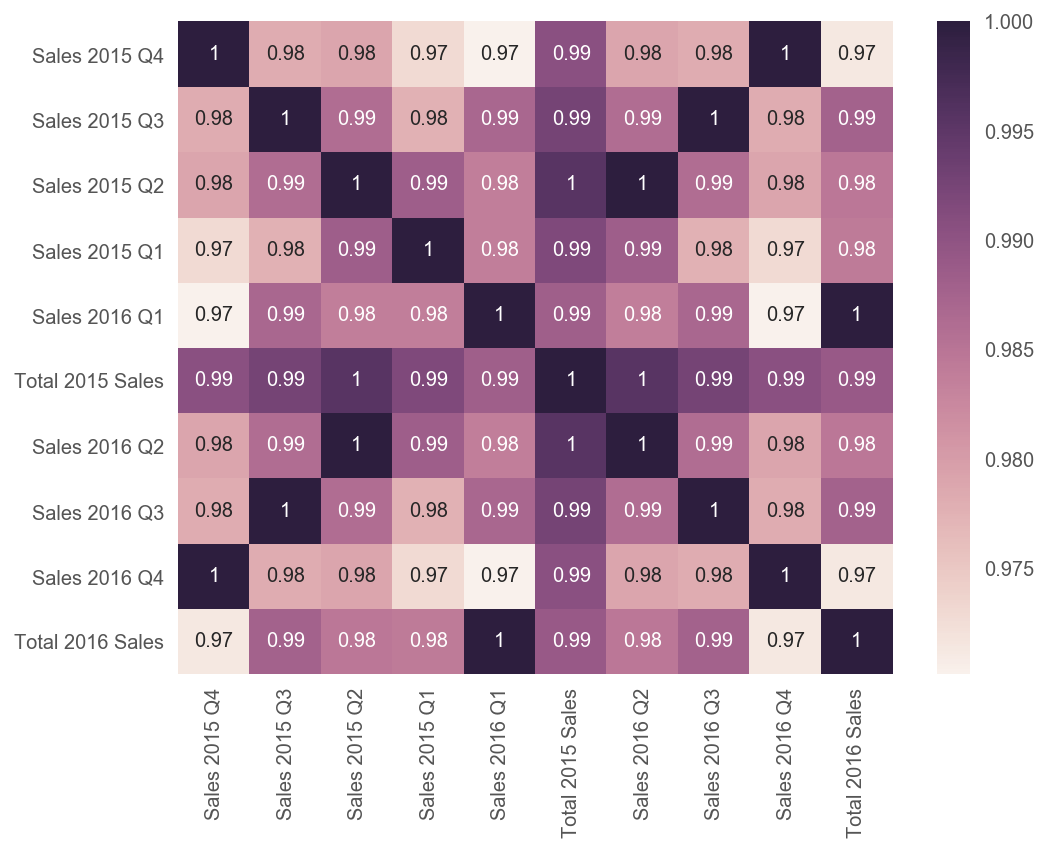

In [58]:
%config InlineBackend.figure_format = 'retina'
#these are just different quarters of the same year so having a high correlation doesn't really come as a surprise

sns.heatmap(S15_16d.corr(),annot=True)

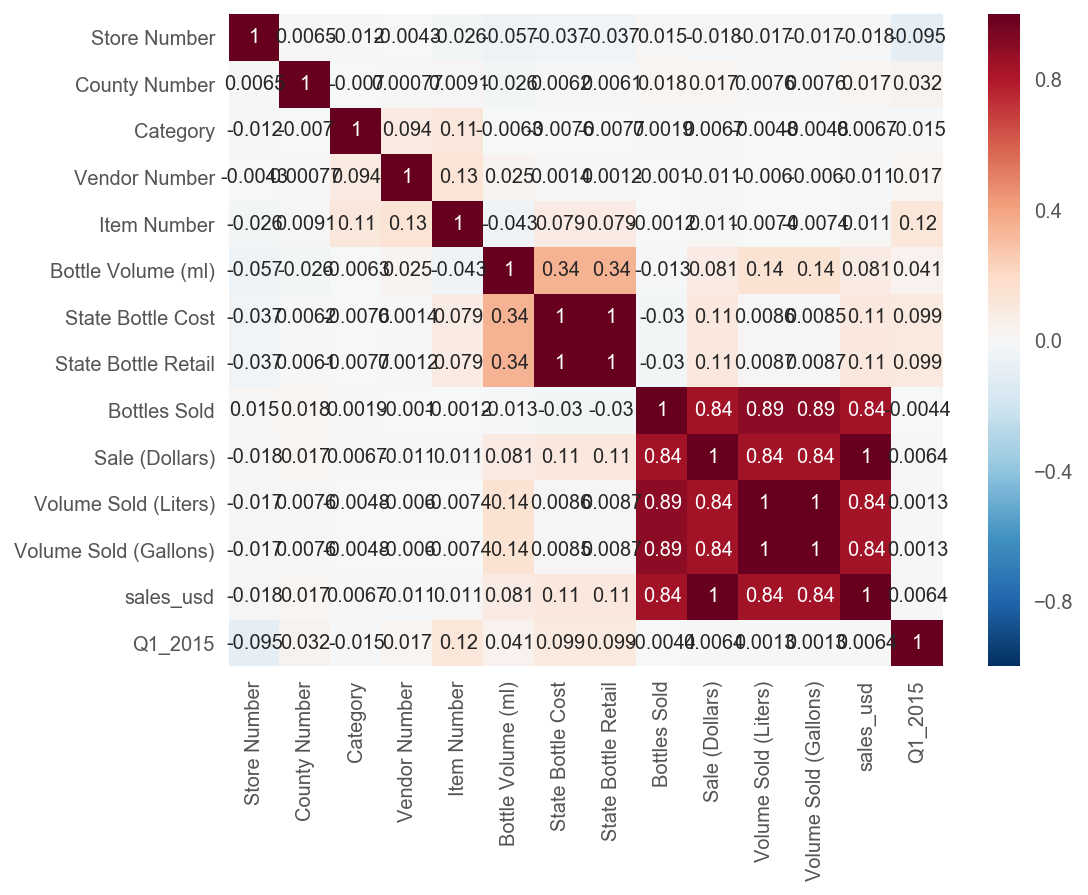

In [59]:
%config InlineBackend.figure_format = 'retina'

#generate a heatmap to explore correlation highest is with the bottles to dollars range
sns.heatmap(iad.corr(),annot=True)

In [17]:
len(iad['Store Number'].unique())

1380

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


In [ ]:
#we're missing quite a few counties which is making the data set incredibly awkward. 
#Thankfully we have zip code and city data that we can use as a substitute. 
#There are only 6 beers in the entire list so they aren't worth worrying about if I only wanted to go with "liquor" and high enough abv makes it moot anyway
#I'm only using one years worth of data and making a simple assumption based off the difference of one quarter

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [161]:
bins = [0, 10, 20, 30, 40, 50, 100, 150, 200, 600]
#SBR = iad['State Bottle Retail']

In [86]:
#len(q1liters), len(y2015)

(1282, 1375)

In [100]:
#sales = iad[year]
#t = q1liters
#v = y2015
#plt.plot(t, v)

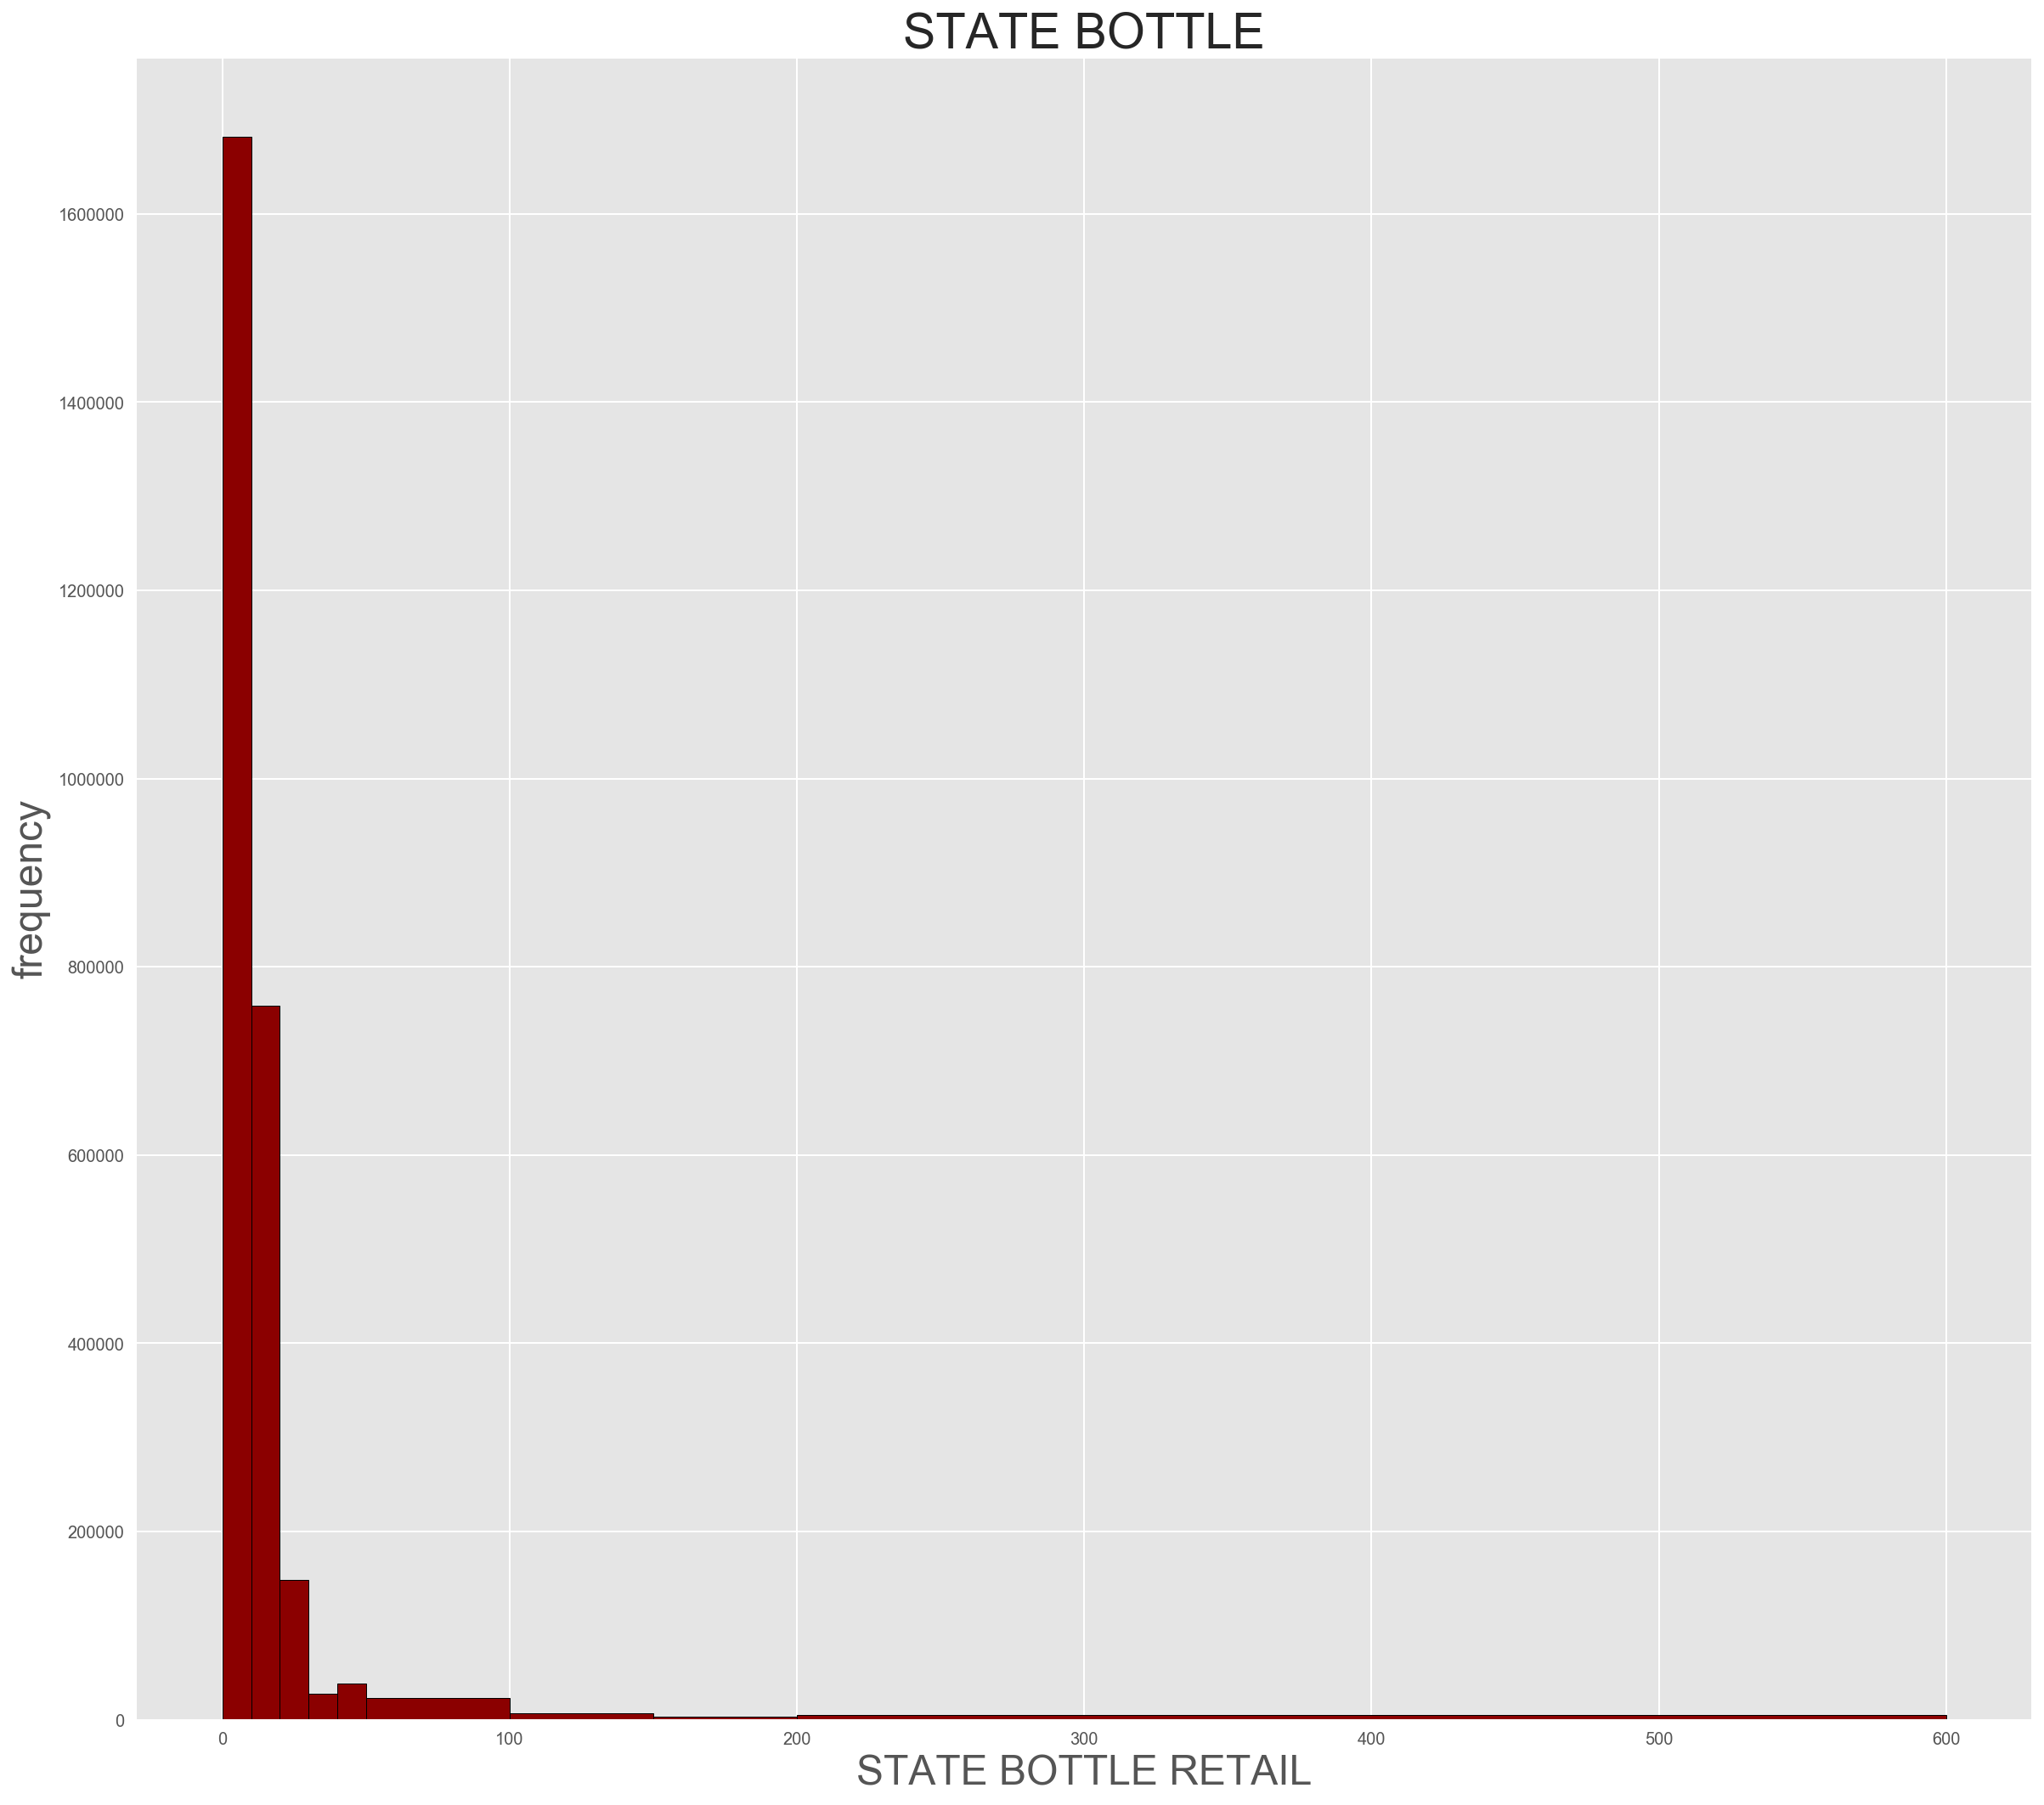

In [162]:
plt.hist(iad['Bottles Sold'],bins=bins, ec='black',color='darkred')
plt.rcParams['figure.figsize'] = (20, 50)
plt.rcParams['font.size'] = 20
plt.xlabel('STATE BOTTLE RETAIL')
plt.ylabel('frequency')
plt.title('STATE BOTTLE')
plt.show()

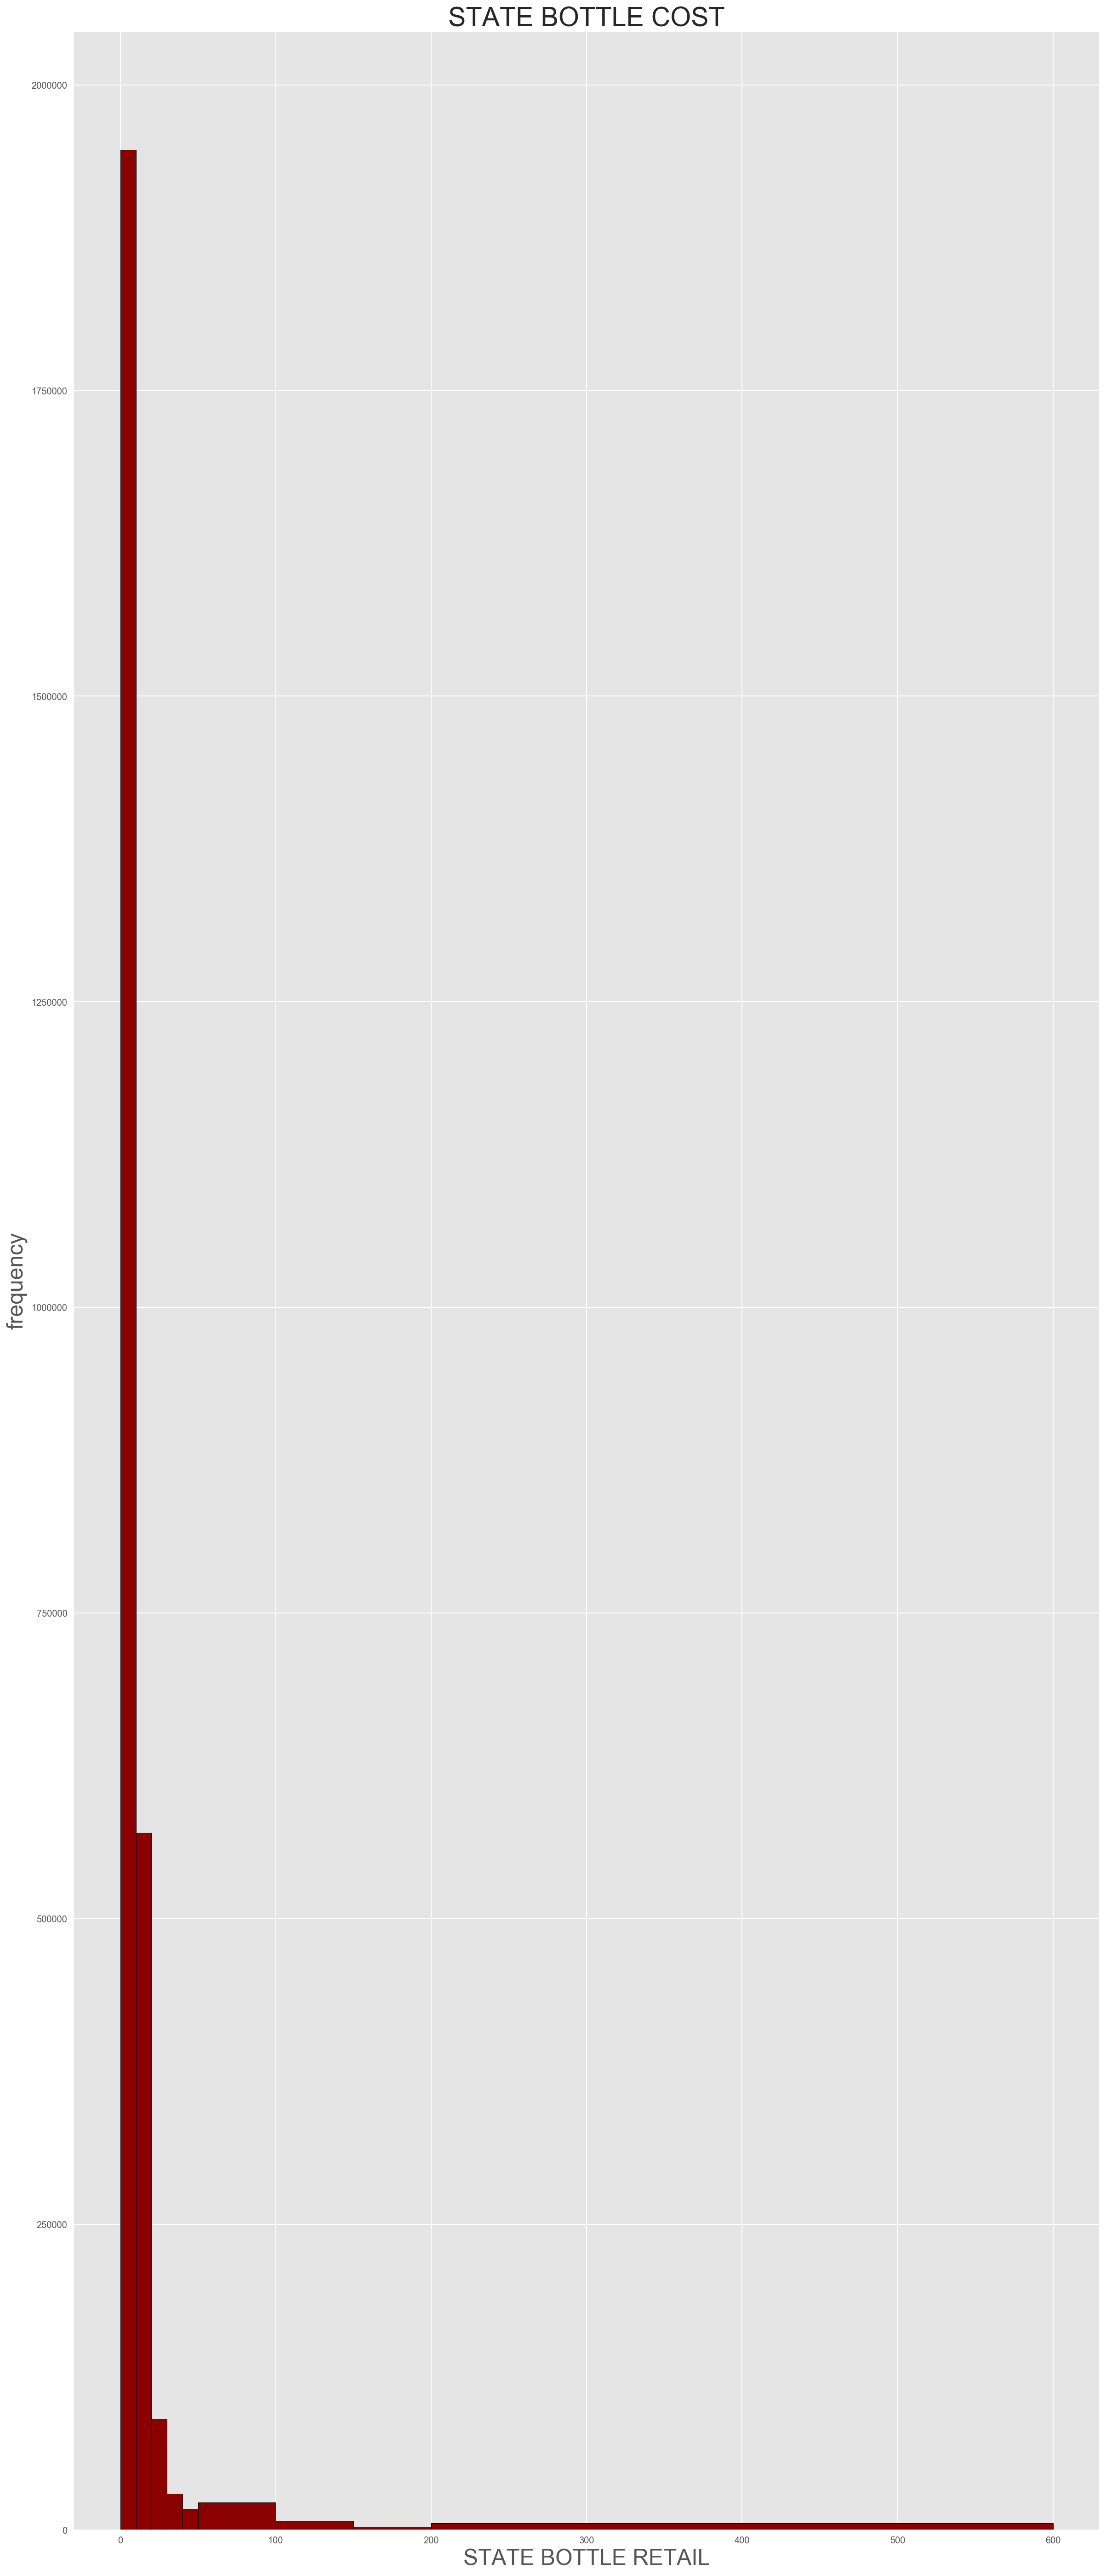

In [163]:
plt.hist(iad['Volume Sold (Liters)'],bins=bins, ec='black',color='darkred')
plt.rcParams['figure.figsize'] = (20, 50)
plt.rcParams['font.size'] = 20
plt.xlabel('STATE BOTTLE RETAIL')
plt.ylabel('frequency')
plt.title('STATE BOTTLE COST')
plt.show()

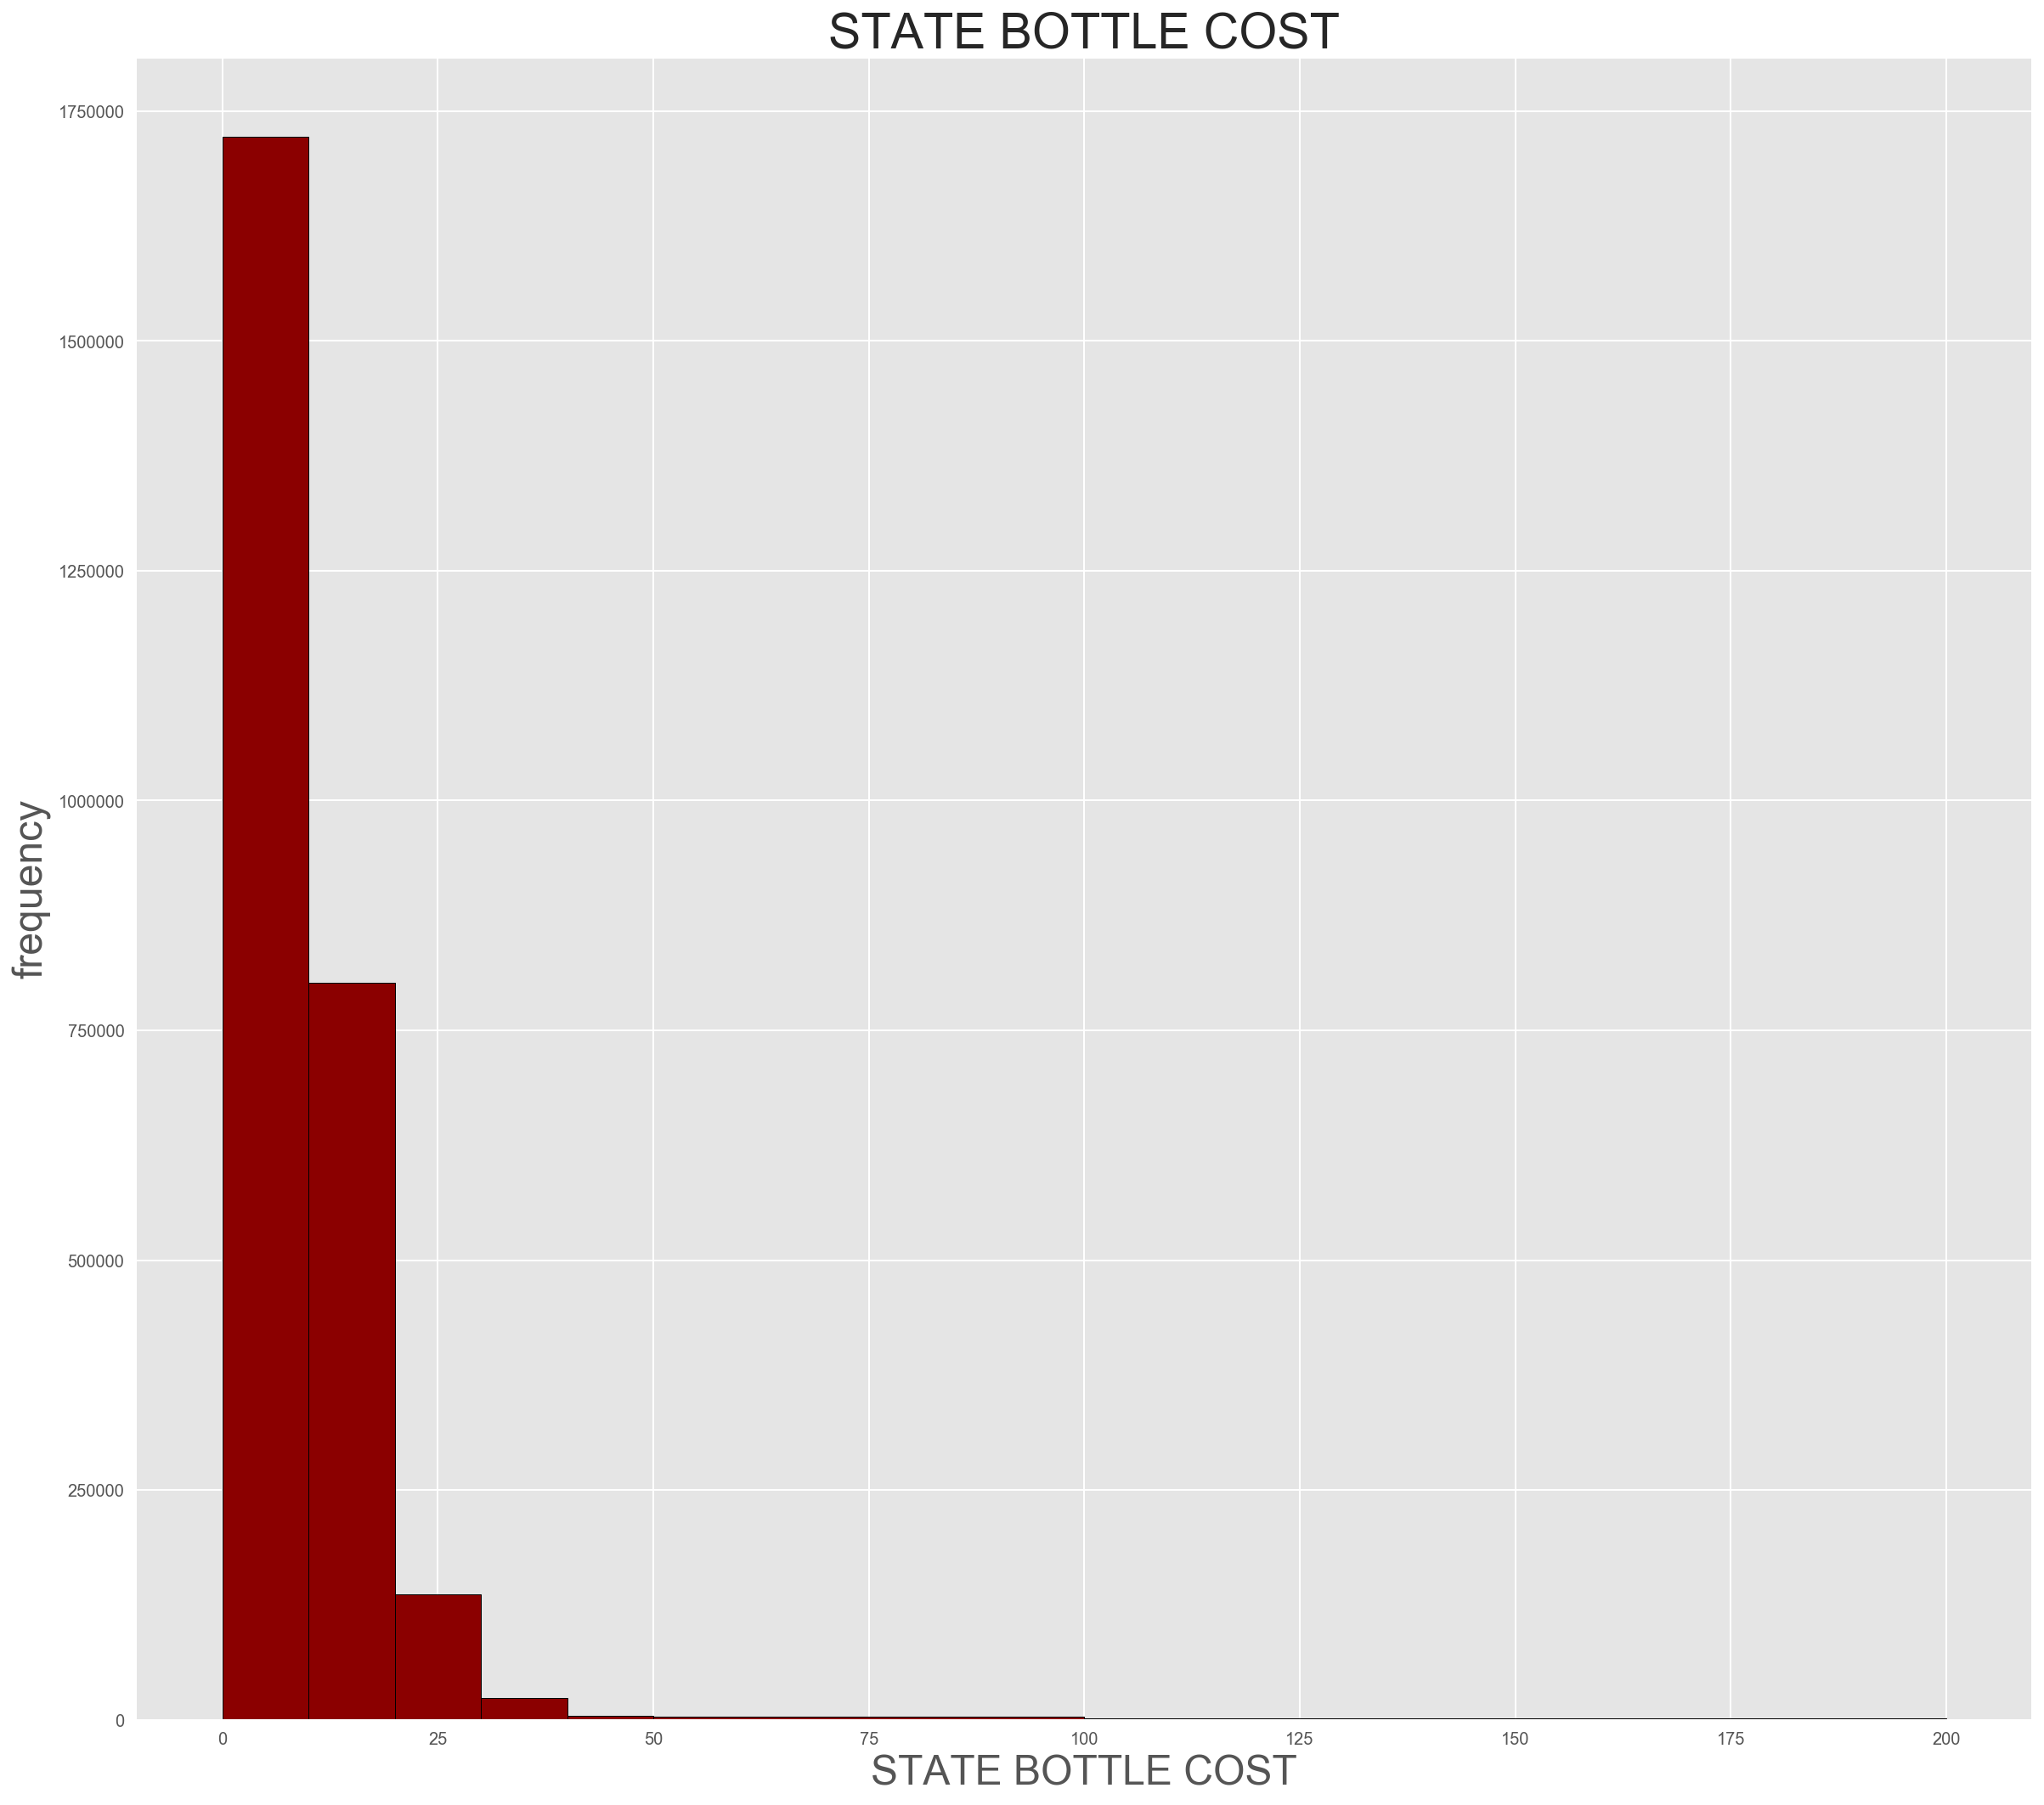

In [158]:
plt.hist(iad['State Bottle Cost'],bins=[0,10,20,30,40,50,100,200], ec='black',color='darkred')
plt.rcParams['figure.figsize'] = (20, 18)
plt.rcParams['font.size'] = 20
plt.xlabel('STATE BOTTLE COST')
plt.ylabel('frequency')
plt.title('STATE BOTTLE COST')
plt.show()

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [149]:
import statsmodels.api as sm

X = iad[['Volume Sold (Liters)', 'Bottles Sold']]
y = iad[['Sale (Dollars)']]

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 4.443e+06
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:41:15   Log-Likelihood:            -1.8123e+07
No. Observations:             2692602   AIC:                         3.625e+07
Df Residuals:                 2692600   BIC:                         3.625e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Volume Sold (Liters)     6.5251      0.010    683.939      0.000       6.506       6.544
Bottles Sold             7.2194      0.011    650.548      0.000       7.198       7.241
==============================================================================
Omnibus:                  6597679.193   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1844282581533.660
Skew:                          24.753   Prob(JB):                         0.00
Kurtosis:                    4057.160   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

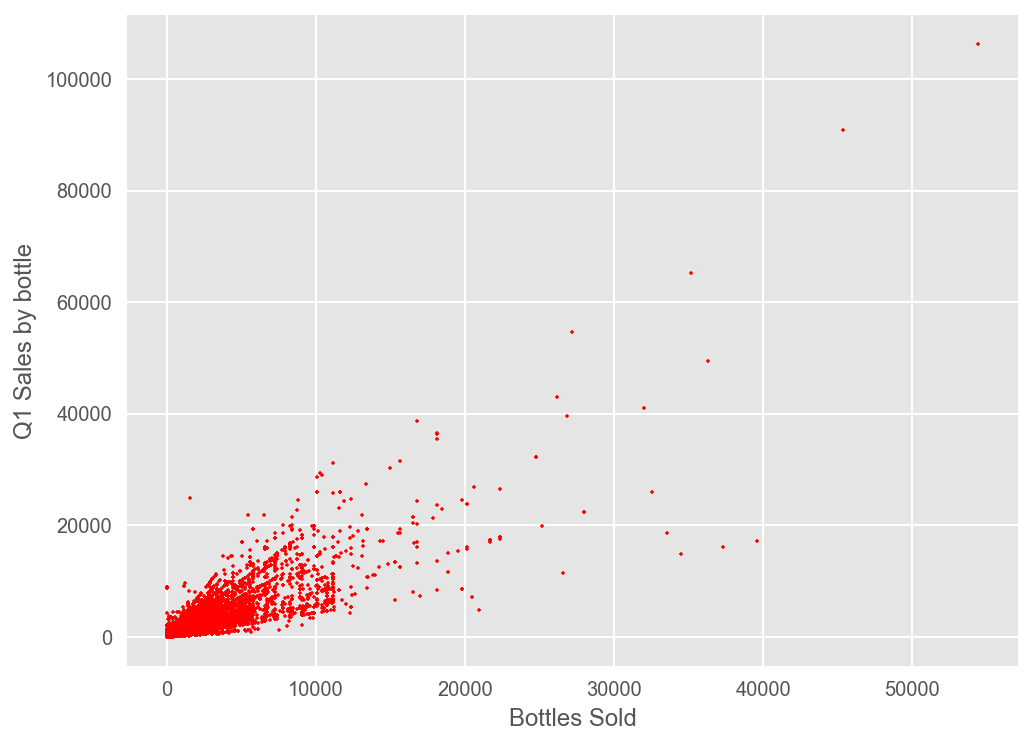

MSE: 3.93170702122e+14


In [148]:
#plotting the relationship between bottles during first q
plt.scatter(predictions, y, s=1, c='r', marker='+', zorder=10)
plt.xlabel("Bottles Sold" )
plt.ylabel("Q1 Sales by bottle")
plt.show()
print "MSE:", model.mse_model

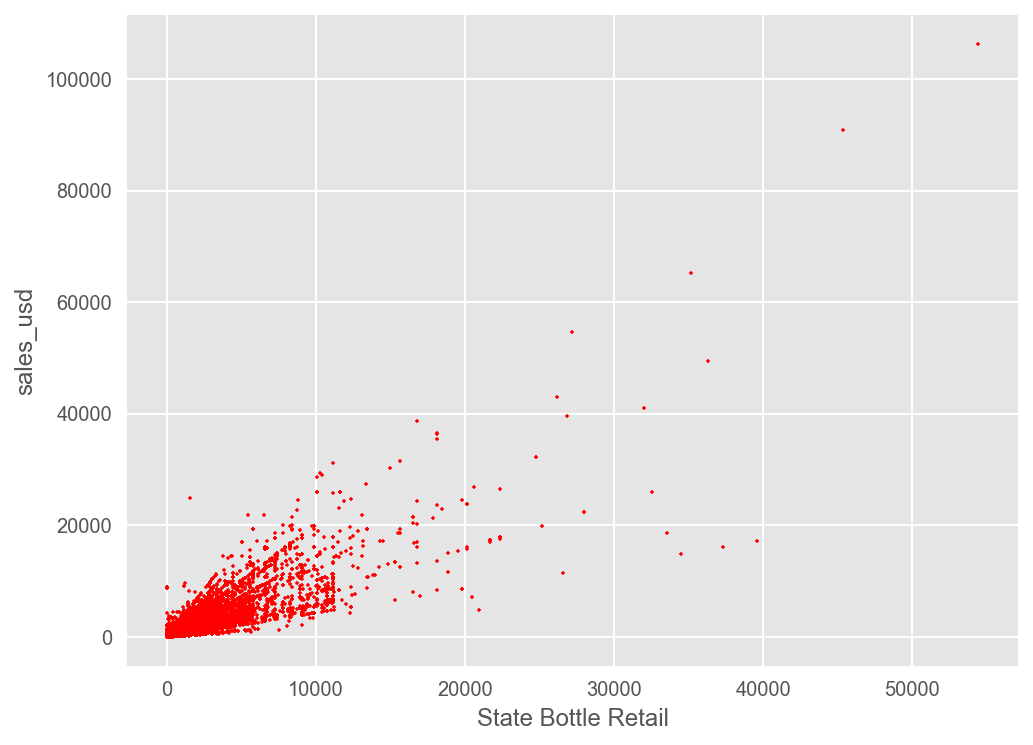

MSE: 182584615851.0


In [153]:
plt.scatter(predictions, y, s=1, c='r', marker='+', zorder=10)
#sns.regplot(predictions,iad['Bottles Sold'],iad,marker = '.', color = 'black')
plt.xlabel("State Bottle Retail" )
plt.ylabel("sales_usd")
plt.show()
print "MSE:", model.mse_model

In [63]:
X1 = S15_16d[['Sales 2015 Q1']]
y1 = S15_16d[['Total 2015 Sales']]

model = sm.OLS(y1, X1).fit() ## sm.OLS(output, input)
predictions1 = model.predict(X1)
#r2 very high but expected as we're literally just charting price
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Total 2015 Sales   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 8.101e+04
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:22:48   Log-Likelihood:                -15012.
No. Observations:                1194   AIC:                         3.003e+04
Df Residuals:                    1193   BIC:                         3.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Sales 2015 Q1     4.2789      0.015    284.629      0.000       4.249       4.308
==============================================================================
Omnibus:                      935.053   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249347.756
Skew:                           2.601   Prob(JB):                         0.00
Kurtosis:                      73.604   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

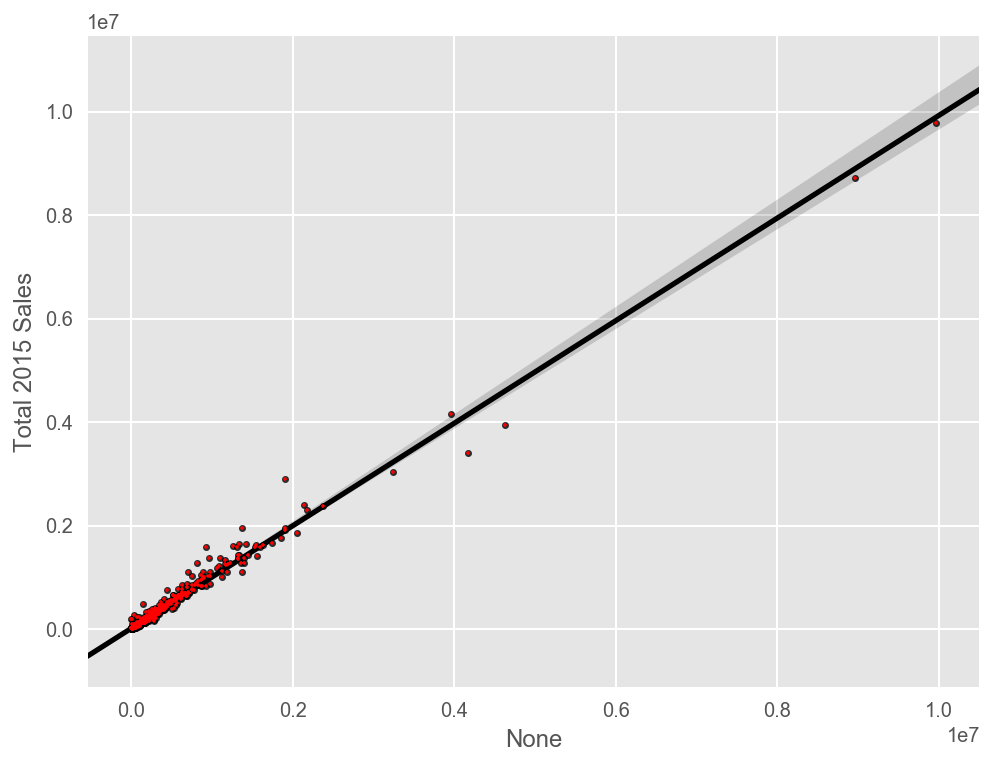

MSE: 3.93170702122e+14


In [147]:
plt.scatter(predictions1, y1, s=1, c='r', marker='+', zorder=10)
plt.xlabel("Q1 Sales" )
plt.ylabel("2015 SALES")
sns.regplot(predictions1,S15_16d['Total 2015 Sales'],S15_16d,marker = '.', color = 'black')
plt.show()
print "MSE:", model.mse_model

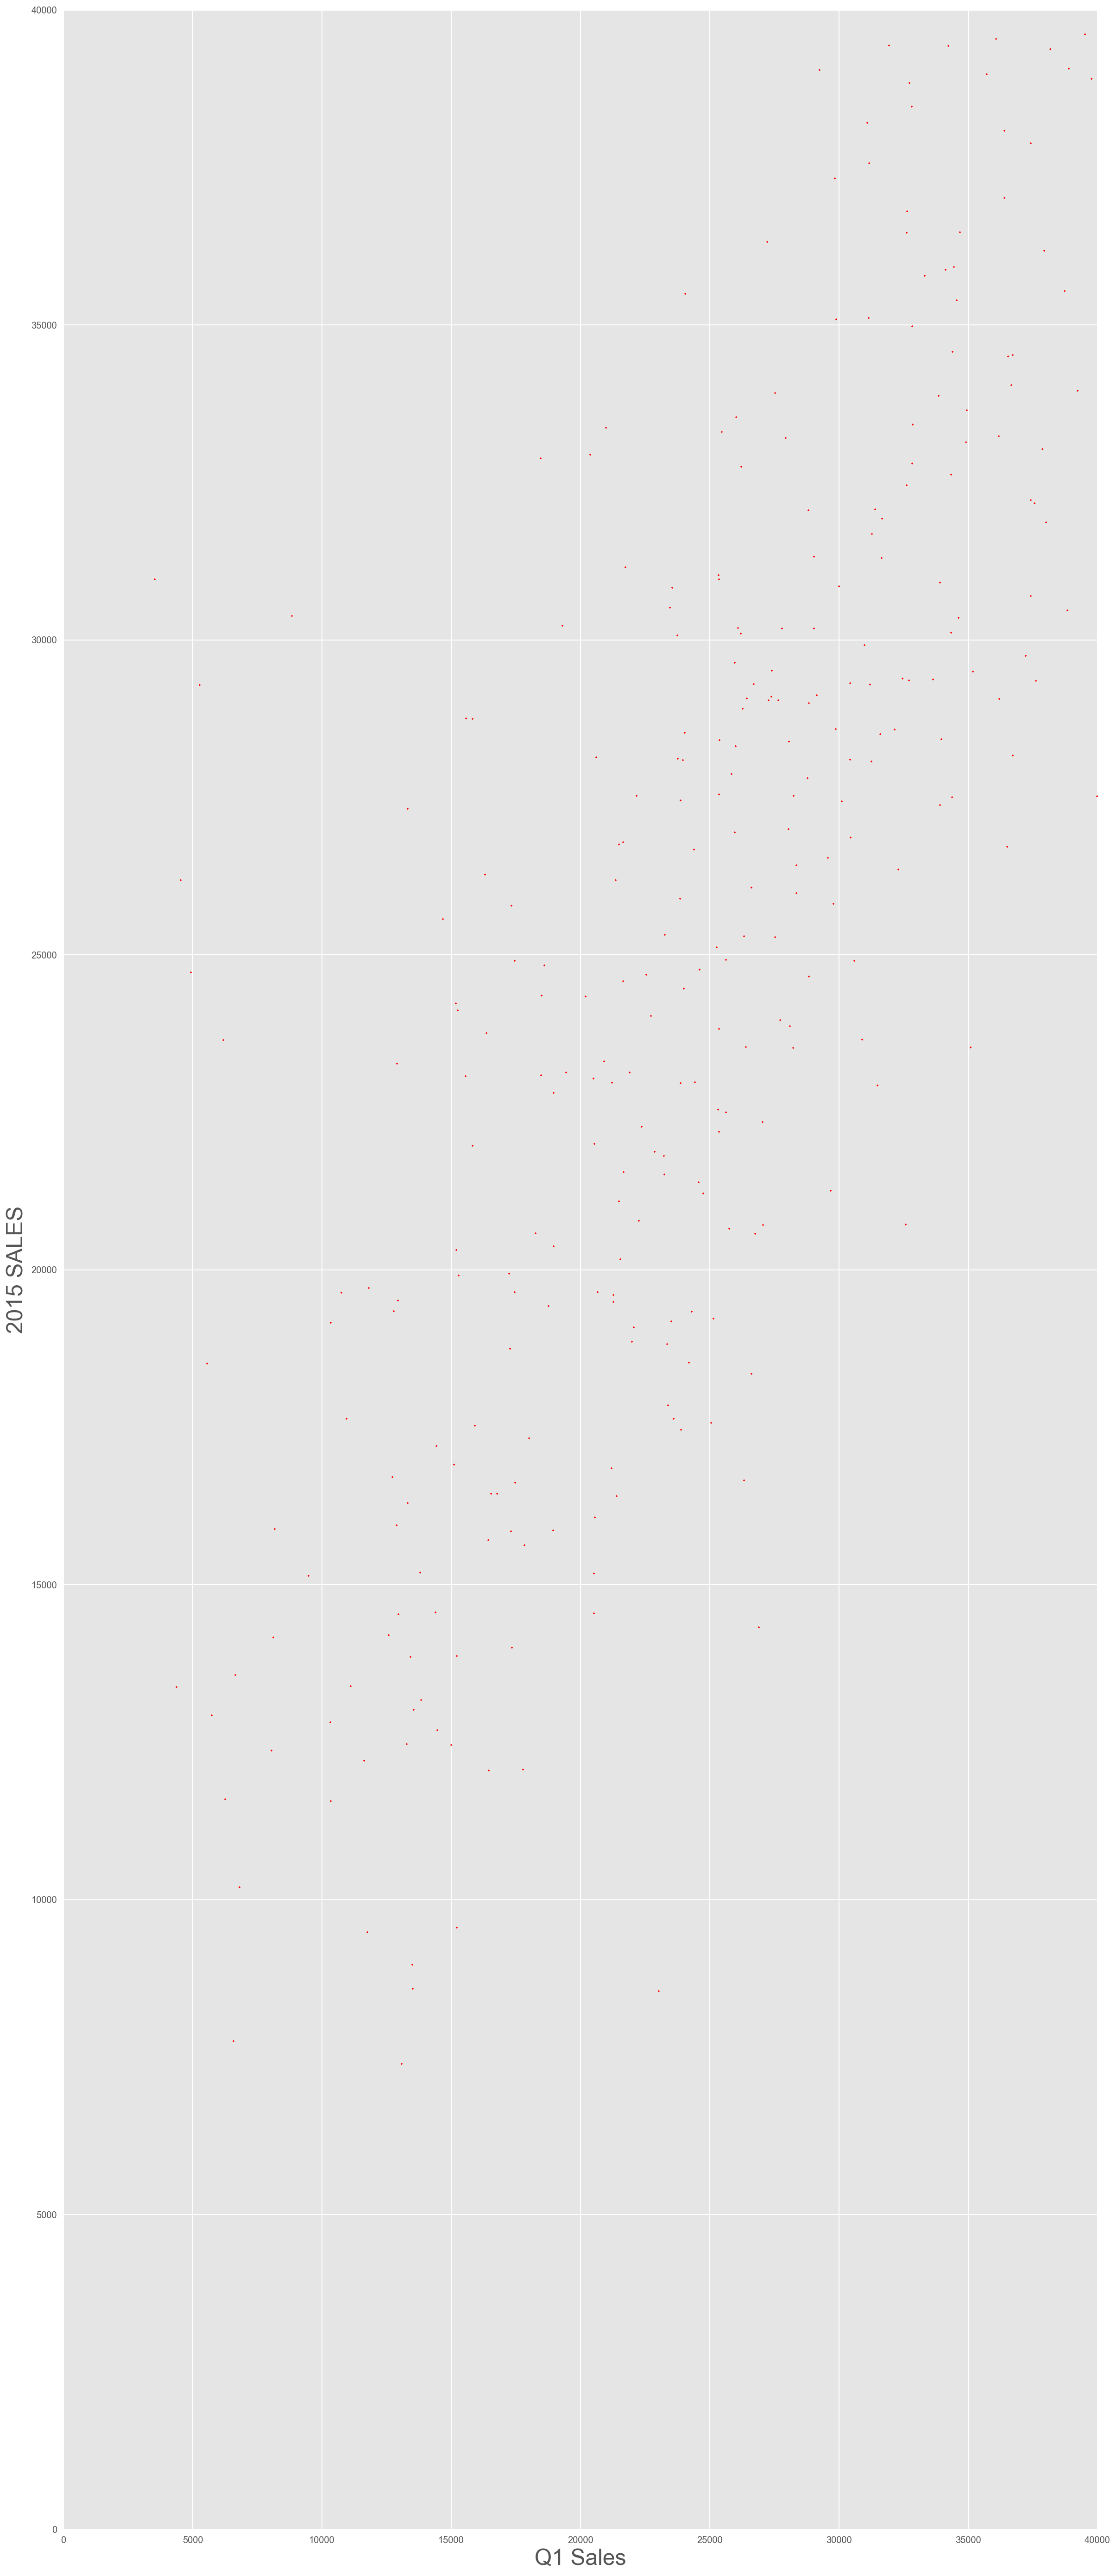

MSE: 182584615851.0


In [189]:
plt.scatter(predictions1, y1, s=1, c='r', marker='+', zorder=10)
plt.xlabel("Q1 Sales" )
plt.ylabel("2015 SALES")
plt.xlim(0, 160000)
plt.ylim(0, 160000)
plt.show()
print "MSE:", model.mse_model

In [92]:
X2 = S15_16d[['Sales 2016 Q1']]
y2 = S15_16d[['Total 2015 Sales']]

model = sm.OLS(y2, X2).fit() ## sm.OLS(output, input)
predictions2 = model.predict(X2)
#r2 very high model overfit need to add more variables 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Total 2015 Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 5.673e+04
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:00:23   Log-Likelihood:                -15221.
No. Observations:                1194   AIC:                         3.044e+04
Df Residuals:                    1193   BIC:                         3.045e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Sales 2016 Q1     4.1752      0.018    238.177      0.000       4.141       4.210
==============================================================================
Omnibus:                     1027.648   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193377.112
Skew:                           3.197   Prob(JB):                         0.00
Kurtosis:                      65.017   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
#my various attempts at figuring out how to plot a line.


#from scipy import stats
#from scipy import linregress
#import pylab
#slope, intercept, r_value, p_value, slope_std_error =  stats.mstats.linregress(X2, y2)
#predict_y = intercept + slope * X2
#pred_error = y2 - predict_y
#degrees_of_freedom = len(X2) - 2
#residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
#pylab.plot(predictions2, y2, 'o')
#pylab.plot(predictions2, predict_y, 'k-')
#pylab.show()

#linregress(X2,y2)

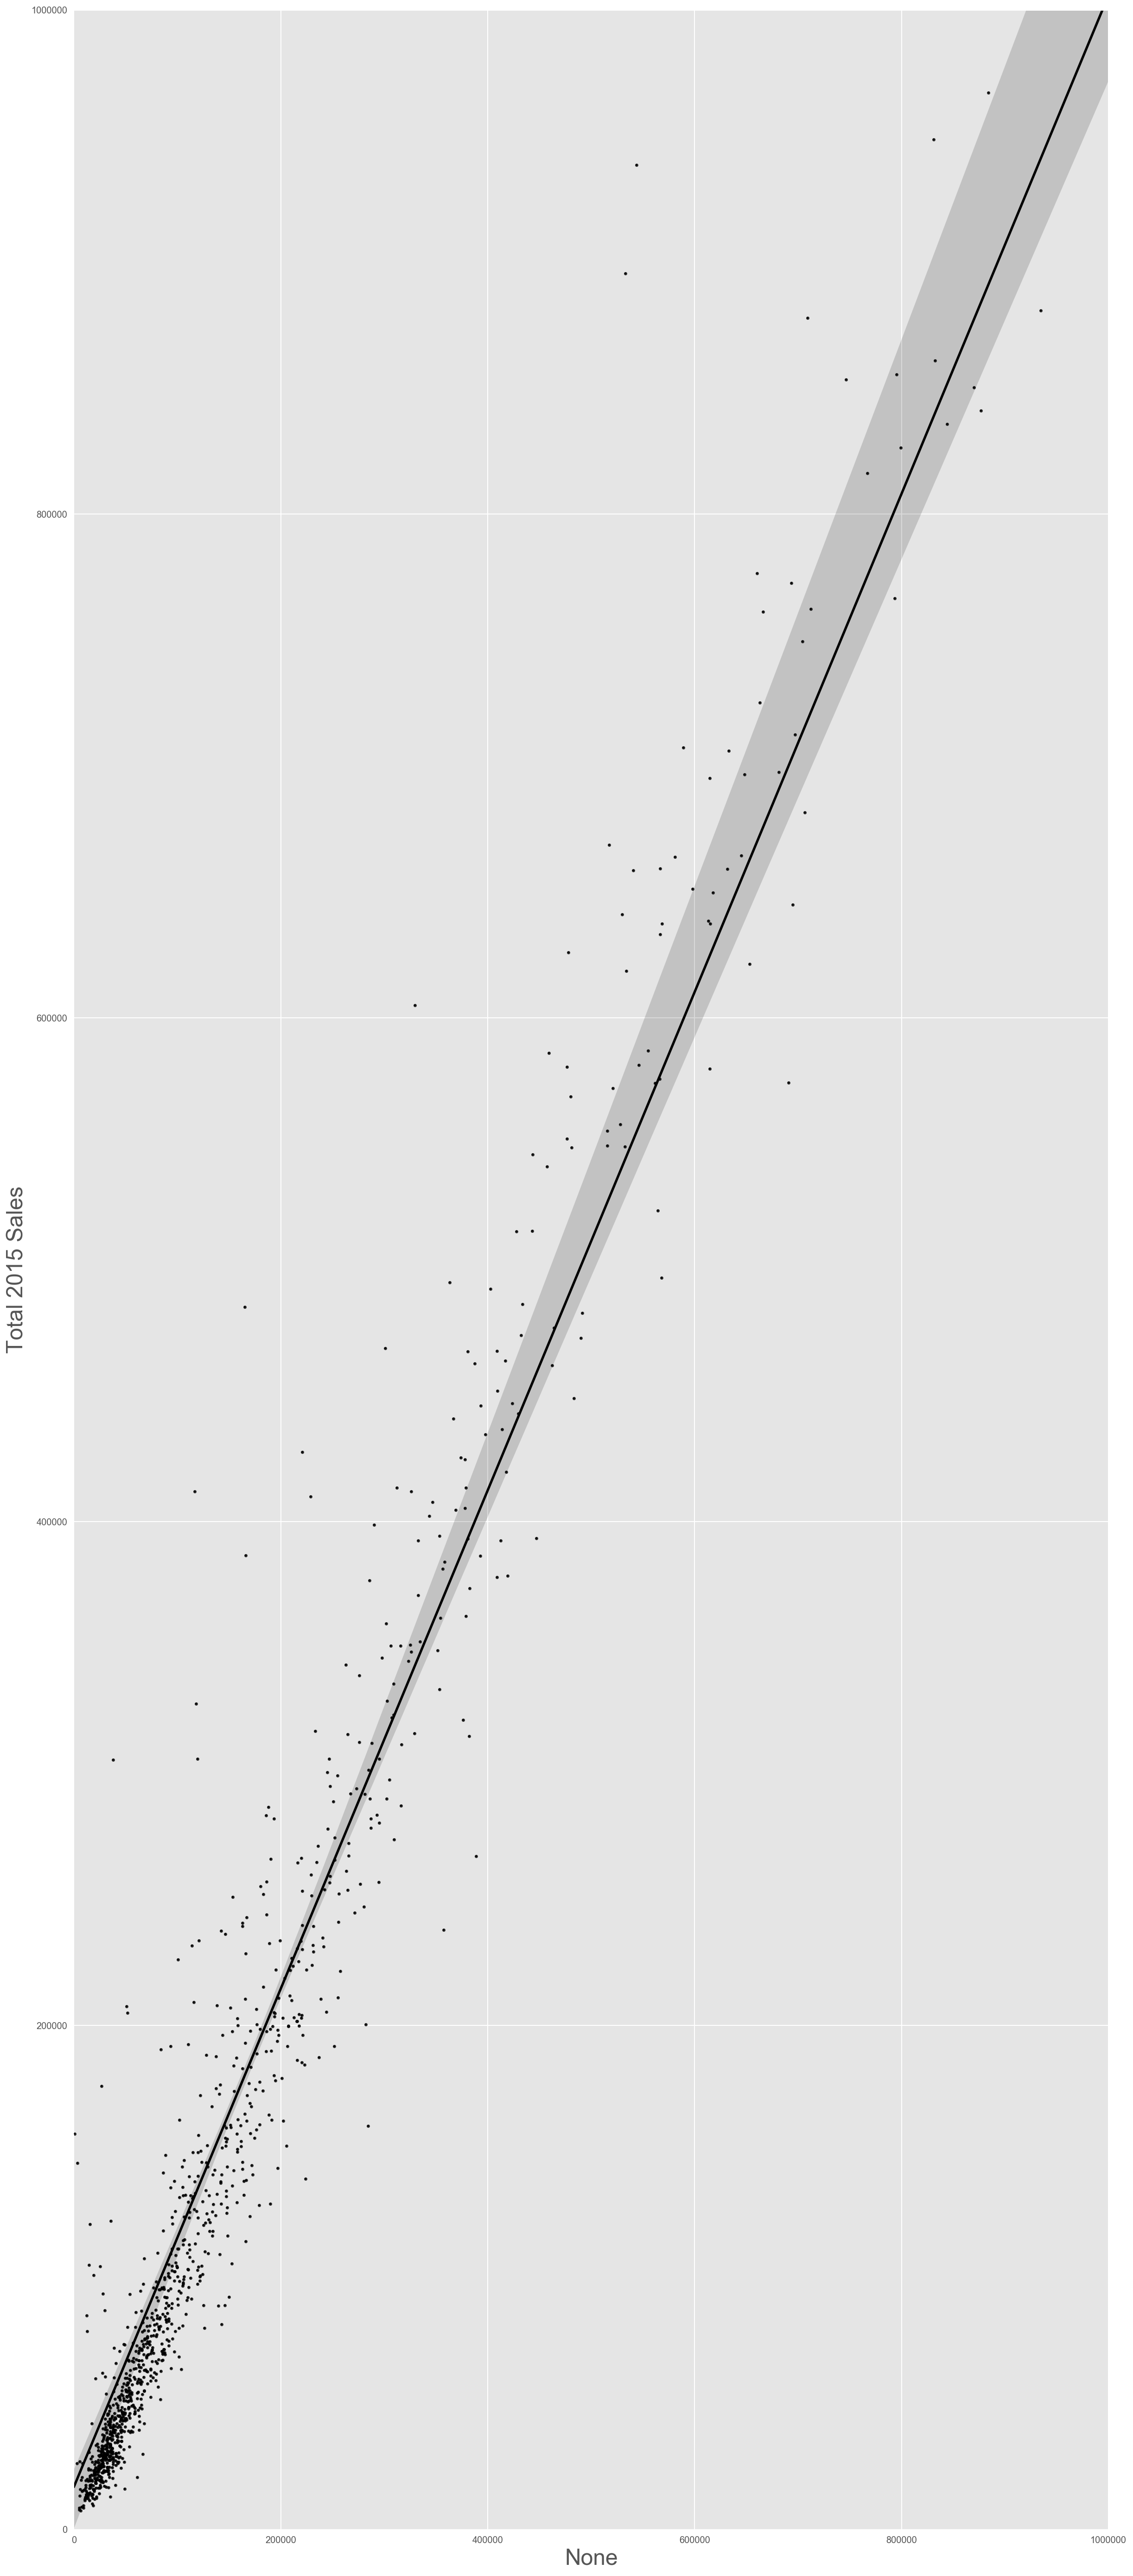

MSE: 182584615851.0


In [201]:
plt.scatter(predictions2, y2, s=1, c='black', marker='+', zorder=10,)
plt.xlabel("Q1 Sales")
plt.ylabel("2016 SALES")
plt.xlim(0, 1000000)
plt.ylim(0, 1000000)

sns.regplot(predictions2,S15_16d['Total 2015 Sales'],S15_16d,marker = '.', color = 'black')   
#finally found a way to make the line plot work
plt.show()
print "MSE:", model.mse_model

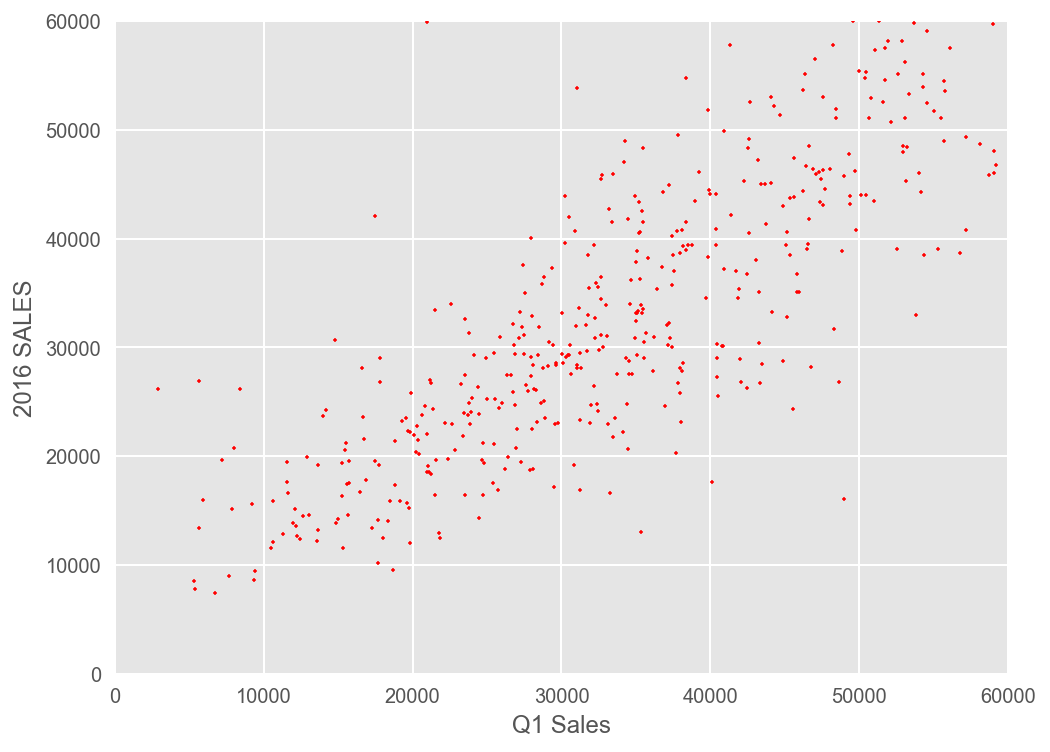

MSE: 3.93170702122e+14


In [95]:
plt.scatter(predictions2, y2, s=1, c='r', marker='+', zorder=10)
plt.xlabel("Q1 Sales" )
plt.ylabel("2016 SALES")
plt.xlim(0, 60000)
plt.ylim(0, 60000)
plt.show()
print "MSE:", model.mse_model

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [81]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [85]:
from sklearn.metrics import make_scorer, r2_score
r_score = make_scorer(r2_score)

In [88]:
cross_val_project = cross_val_score(Lasso(normalize=True), X1, y1, scoring=r_score, cv=10)
#going to go through full thought process for this one as I found it somewhere in the depths of stack overflow
#score is the derivative of the log likelihood function with respect to the parameters
#make_scorer makes a scorer from a performance metric or loss function.
#r2 is the R2 regression score function
#cross_val_score evaluates a score by cross validation
#then we utilize Lasso regularization methods with our given data to generate our values
#that increases our prediction accuracy and interpretability. My values are very overfit.

cross_val_project

array([ 0.9585184 ,  0.98401637,  0.92623701,  0.9835531 ,  0.96590536,
        0.9172497 ,  0.8428739 ,  0.91900758,  0.99867119,  0.86675662])

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

The requested task was to create a model to predict the 2016 Iowa liquor sales. We calculated this by finding the difference of first quarter 2015 and first quarter 2016, and then extrapolating the data over the rest of the year. Prior to the creation of the model, we refined our data by eliminating any entities that possessed a missing value this roughly equaled 1% of the given data.  The total value for the dropped data was around 400,000.

Following that, I created a new database for the quarters and yearly values for 2015 and 2016, so that it would be easier to view the individual change by store.
I then began creating heatmap charts to ascertain which column values had a strong correlation. Unsurprisingly, cost, liquid, and bottles had the strongest in the first set.  Whereas the second set were all highly correlated due to being part of a two year gap measured by all the same metrics.

The model predicts that we will have a 10% increase in sales for the state of Iowa. This will bring our yearly up to 315,368,440.16 compared to last years 283,912,803.61. 

The model accomplishes the task that it was assigned to do which was to gauge the increase or decrease of liquor sales for 2016, and while the model can be improved it works for this particular task and situation.

My recommendations would be to add more variables to the model such as price per liter or finding the marginal increase so that we do not rely so heavily on only one constant. I would also prefer to have a larger time period. One year is not enough to have noticeable purchasing trends for something like liquor.